In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_validate
import pickle   # reads/saves files in arbitrary format
from sklearn.preprocessing import normalize

In [80]:
df = pd.read_csv('cars.csv')

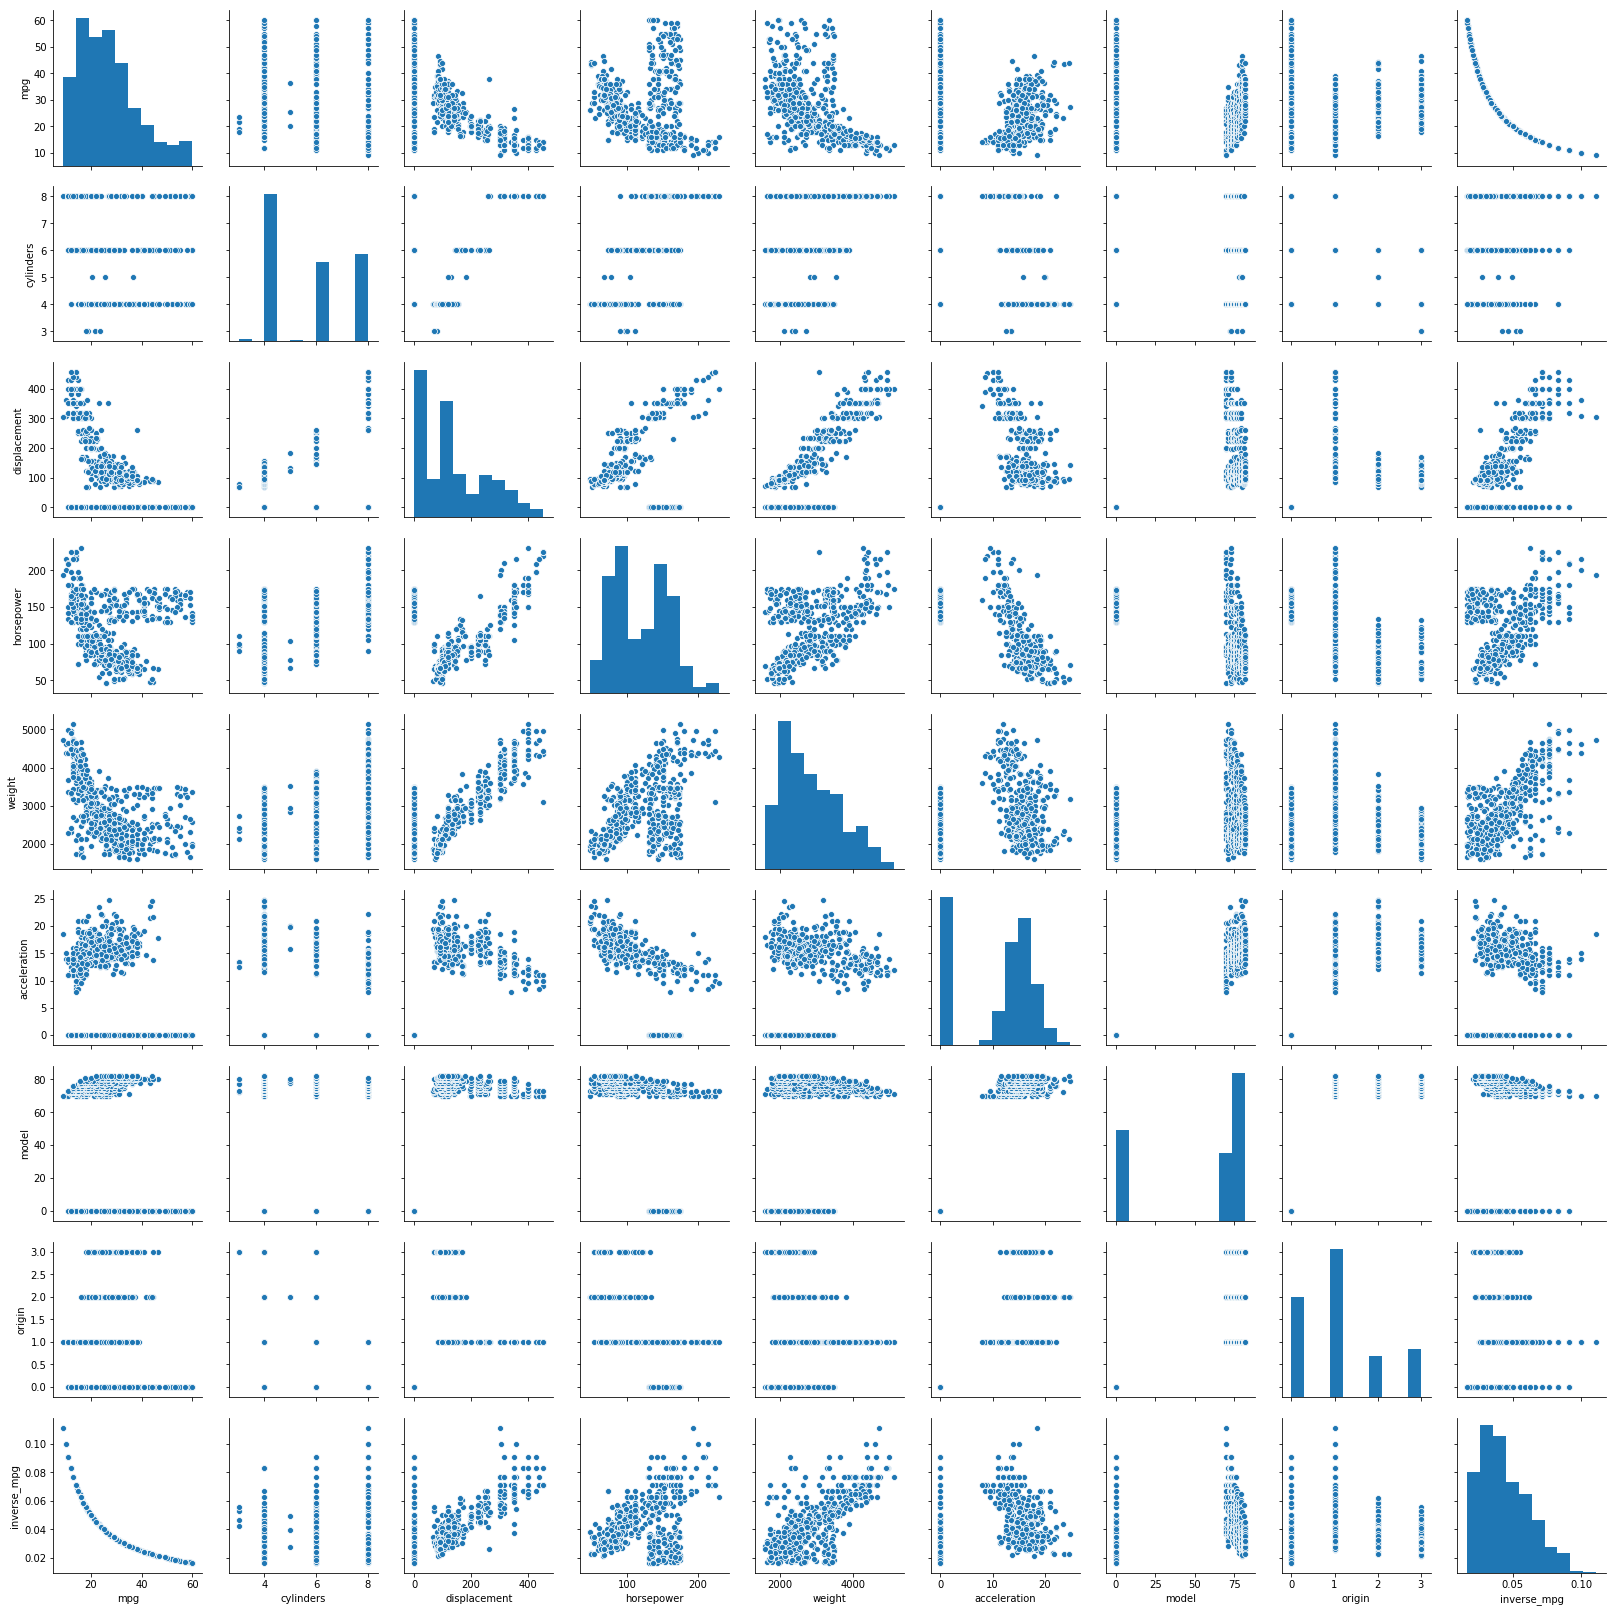

In [54]:
sns.pairplot(df)

In [55]:
df['inverse_mpg']=df['mpg']**(-1)
df['inverse_acceleration']=df['acceleration']**(-1)
df1=df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [81]:
X= df1[['cylinders','horsepower','weight']]
y = df1.mpg

model = LinearRegression()
model.fit(X,y)
print(model.coef_)

[-0.38897448 -0.04272767 -0.0052723 ]


In [57]:
cross_validate(model, X, y, cv=5)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00416994, 0.0050602 , 0.00407696, 0.00360394, 0.00779295]),
 'score_time': array([0.00301695, 0.00179768, 0.0012629 , 0.00135922, 0.00190997]),
 'test_score': array([ 0.77456684,  0.69999378,  0.78404328,  0.49550944, -0.83743729]),
 'train_score': array([0.78565575, 0.81658935, 0.81565434, 0.83019767, 0.81818265])}

In [82]:
pickle.dump(model,open('linreg.p','wb'),protocol=2)

Restart Kernel here

In [27]:
import pickle
model = pickle.load(open('linreg.p','rb'))

In [28]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,displx
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0.003257
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0.002857
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0.003145
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0.003289
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0.003311


In [53]:
cyl = 8
horse = 130
weight = 2000
displacement = 350
1/model.predict([[cyl,horse,1/displacement]])

array([29.22951981])

In [69]:
X.values.T

In [76]:
nx=normalize(X.values.T)

In [78]:
nx[1]@nx[1]

1.0

In [66]:
np.linalg.det(x.T @ x)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

## stuff I did earlier in the morning

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
#sns.pairplot(df)

In [9]:
df['displx']=df['displacement']**(-1)

In [10]:
df['displacement'].head(),df['displx'].head()

(0    307.0
 1    350.0
 2    318.0
 3    304.0
 4    302.0
 Name: displacement, dtype: float64, 0    0.003257
 1    0.002857
 2    0.003145
 3    0.003289
 4    0.003311
 Name: displx, dtype: float64)

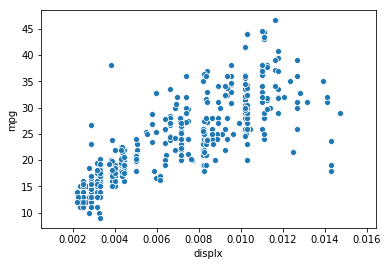

In [11]:
#sns.scatterplot(x=df['displx'],y=df['mpg'])

In [12]:
df1=df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [13]:
X,y = df1[['displx','mpg']].values.T

In [14]:
reg = Lasso(alpha=0.1)

In [15]:
#reg.fit(X,y)